# Python para Métodos Numéricos

### Prof. Pedro Peixoto <ppeixoto@usp.br>

Março 2023



---



---



*Referências*:



[1]   Van Der Walt, S., Colbert, S.C. and Varoquaux, G., 2011. The NumPy array: a structure for efficient numerical computation. Computing in science & engineering, 13(2), pp.22-30. https://hal.inria.fr/inria-00564007/en

[2]  Varoquaux, G., Gouillart, E., Vahtras, O., Haenel, V., Rougier, N.P., Gommers, R., Pedregosa, F., Jędrzejewski-Szmek, Z., Virtanen, P., Combelles, C. and Pinte, D., 2015. Scipy lecture notes. https://scipy-lectures.org/index.html




---


## Qual a intenção desse notebook e dessa atividade?

Nesse notebook vamos revisar alguns conceitos de Python fundamentais para a computação científica e o desenvolvimento de métodos numéricos para problemas aplicados.

Ao final espera-se que você entenda que é preciso atenção ao programar em Python certas operações que usam vetores, matrizes e laços (for).



---






## Por que devo me preocupar com a forma de escrever o código em Python?



Pois isso pode significar a diferença entre esperar segundos ou horas/dias por resultados de uma excecução....Vamos a um exemplo.

Série harmônica alternante - aproxima $ \ln(2)$

$$ {\displaystyle \sum _{k=1}^{\infty }{\frac {(-1)^{k+1}}{k}}=\ln 2.} $$

Não temos infinito no computador, então esse será nosso infinito:

In [ ]:
n = 4000000 # Nosso infinito

Primeiro uma implementação "ingênua":

In [ ]:
# O caso ingênuo - série harmônica alternante - aproxima ln(2)
import time
import math

tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
soma = 0.0                  # Essa variável vai acumular a soma da série

# Vamos fazer a soma 
for k in range(1,n+1):
    soma = soma + ((-1)**(k+1))/(k)  #Termo principal da soma

tempo_de_execução = time.time() - tempo_inicial # Quanto tempo se passou, em segundos

print("Soma:", soma, " Valor exato:", math.log(2.0), "Erro:", soma - math.log(2.0), " Tempo de execução:", tempo_de_execução, "segundos.")



NameError: ignored

**Observação:** Modifique o valor de $n$ e verifique a "lentidão" da execução do código 

**Como melhorar isso?**

Você consegue melhorar isso para obter exatamente o mesmo resultado em menos de 0.1 segundos?

Dica, use numpy: https://numpy.org/doc/stable/user/quickstart.html

Mais adiante vamos explicar os detalhes, mas por ora vamos direto ao ponto e ver uma possibilidade de código mais eficiente para a mesma conta.

In [ ]:
# O caso mais eficiente - série harmônica alternante - aproxima ln(2)
# (Isso fica oculto e será mostrado na aula apenas)

#Vamos usar o numpy!
import numpy as np

tempo_inicial = time.time() # Essa variável vai contar o tempo de execução

a = 1/np.arange(1,n+1)        # Gera um vetor de números de 1/1, 1/2, até 1/n
b = np.ones(n)                # Vetor de valores 1  
b[1::2] = -1                  # Troca o sinal de b nos a cada 2 elementos
soma = np.sum(a*b)            # Faz o produto entre elementos de 'a' e 'b' e soma  

tempo_de_execução_2 = time.time() - tempo_inicial #Quanto tempo levou

print("Soma:", soma, " Valor exato:", np.log(2.0), "Erro:", soma - np.log(2.0), " Tempo de execução:", tempo_de_execução_2, "segundos.")


Soma: 0.6881721793101955  Valor exato: 0.6931471805599453 Erro: -0.004975001249749811  Tempo de execução: 0.0016582012176513672 segundos.


In [ ]:
ganho = tempo_de_execução/ tempo_de_execução_2
print("Ganho de tempo: ", ganho, " vezes mais rápido")

Ganho de tempo:  26.72578153172302  vezes mais rápido


_Este exemplo é para deixar claro que implementações ingênuas em Python podem gerar tempos de processamentos absurdos! Evite "loops" em python em ranges grandes (vetores e matrizes) -> use numpy e aritmética vetorial!_

**Qual é o "pulo do gato"?**

- As operações no primeiro caso são **interpretadas** a cada iteração
- As operações no segundo caso executam códigos pré **compilados** de C 

 As funções "arange", "=", "*", "/", "sum" são implementadas em C e pré-compiladas. Ao pré-compilar essas funções, os executáveis resultantes tem rotinas otimizadas (máquina-dependente) para cálculos de operações vetoriais.


## Tá bom, fiquei preocupado, mas e agora? Vamos estudar um pouco...

A ideia central será usar numpy e ferramentas de vetorização

#### **Listas ou vetores?** 
Listas são flexíveis, mas temos que ter cuidado...


$$ {\displaystyle \sum _{k=1}^{\infty }{\frac {(-1)^{k+1}}{k}}=\ln 2.} $$

Vamos construir todos os termos da série e só somar no final.

In [ ]:
#Vamos usar o numpy!
import numpy as np

n = 1000000                  # Nosso infinito

# Usando lista para guardar os termos
minha_lista = []                # Lista genérica (ponteiro para início da lista)
tempo_inicial = time.time()
for k in range(1, n+1):
    minha_lista.append(float(((-1)**(k+1))/(k)))    #Usando listas
somalista = sum(minha_lista)
tempo_lista = time.time() - tempo_inicial 

# Usando vetor para guardar os termos
meu_vetor = np.empty(n)         # Vetor vazio, mas tamanho definido
tempo_inicial = time.time()
for k in range(1,n+1):
    meu_vetor[k-1] = ((-1)**(k+1))/(k)  #Usando vetores
somavetor = np.sum(meu_vetor)
tempo_vetor = time.time() - tempo_inicial 

print("Tempo de execução lista:", tempo_lista, "Estimativa de ln(2):", somalista)
print("Tempo de execução vetor:", tempo_vetor, "Estimativa de ln(2):", somavetor)


Tempo de execução lista: 0.7201550006866455 Estimativa de ln(2): 0.6931466805602525
Tempo de execução vetor: 1.1374168395996094 Estimativa de ln(2): 0.6931466805601952


**Listas ou vetores (numpy arrays)?**

- Listas são mais flexiveis (inclusão/remoção de termos simples) e podem ter variáveis de tipos diferentes. Os dados podem ficar espalhados na memória, logo o acesso pode ser mais lento. Ideal para programas heterogêneos que exigem flexibilidade.


- Vetores são preferencialmente constituídos de um número fixo de elementos do mesmo tipo. Os dados ficam alinhados na memória de forma compacta, logo o acesso pode ser mais rápido. Menos flexíveis (inclusões/remoções mais lentas). Permite usarmos funções pré-compiladas do numpy, escrito em C/C++ e otimizadas para performance. Ideal para algebra linear, computação científica e bases de dados grandes.

#### **Loops ou vetorização?** 

Loops (for) são ótimos, mas temos que ter cuidado ...

Vejamos um simples exemplo de multiplicar um vetor cheio de "1" pelo número 3.
$$ \vec{b}=3\vec{a}, \quad a_i=1, \, i=1,...,n$$

In [ ]:
n= 10000000

# Loop explícito de multiplicação

a = np.ones(1,n)    # Vetor com 1s
b = np.zeros_like(a)  # Vetor de mesmo tamanho do 'a' cheio de zeros
start_time = time.time()
for i in range(len(a)):
    b[i] = 3*a[i]     # Faz b=3*a
tempo = time.time() - start_time
print("Loop explícito    : %s seconds" % tempo)


Loop explícito    : 7.951357841491699 seconds


Neste exemplo acima, o Python faz a mesma conta n-vezes de 1 em 1, uma conta seguida da outra.

Podemos usar loop implícito em Python, que é conhecido como "List Comprehension". Será que ajuda?

In [ ]:
# Loop implicito
a = np.ones(1,n)
start_time = time.time()
b =  [3*x for x in a]    # List comprehension para gerar o b
tempo = time.time() - start_time
print("Loop implicito    : %s seconds" % tempo)


Loop implicito    : 2.5689918994903564 seconds


Parece que ajudou, mas ainda é lento, não?

Vamos tentar agora algo vetorial, isto é, usando uma função implementada em C/C++ e pré-compilada via numpy, que é o operador * entre objetos numpy.

In [ ]:
# Vetorização

a = np.ones(1,n)
start_time = time.time()
b =  3*a
tempo = time.time() - start_time
print("Usando vetorização: %s seconds" % tempo)


Usando vetorização: 0.22351431846618652 seconds


 **Conclusão**:  Evite loops sempre que possível! Use e abuse de vetorização em numpy!

#### Operações _in place_ 

Podemos evitar cópias em memória para ter algum ganho de performance

In [ ]:
n = 40000000    # Nosso número grande
a = np.ones(n) # Um grande vetor de 1s
c = 3.0        # Uma constante
%time a = c*a  # Dessa forma primeiro é feito 'a*c' e depois isso é associado a 'a'
%time a *= c   # Dessa forma o 'c' é multiplicado por 'a' e diretamente salva em 'a'

CPU times: user 40.9 ms, sys: 65.8 ms, total: 107 ms
Wall time: 107 ms
CPU times: user 29.1 ms, sys: 0 ns, total: 29.1 ms
Wall time: 27.1 ms


#### Uso de memória 

O tempo de execução é importante, mas o uso de memoria também é!

Vamos simplesmente guardar um tensor de ordem 3 (um "cubo", generalizando uma matriz) com 

$$ 
R_{ijk}=\sqrt{i^2+j^2+k^2} 
$$ 

In [ ]:
#Matrizes - a forma ingênua
n = 100
R = np.empty((n,n,n))  # Um "cubo" vazio de n x n x n (um tensor de ordem 3)
start_time = time.time()
for i in range(n):
    for j in range(n):
        for k in range(n):
            R[i, j, k] = np.sqrt(i*i + j*j + k*k) # Vamos guardar a raíz dos quadrados dos índices do tensor
tempo = time.time() - start_time
print("Com loops              : %s seconds " % tempo, " Memória auxiliar: ", 0.0, "MB")


Com loops              : 3.2646732330322266 seconds   Memória auxiliar:  0.0 MB


O método acima é demorado, mas só foi necessário armazenar a matriz que nos interessa, sem variáveis auxiliares. 

Podemos fazer isso mais rápido com vetorização, mas isso pode ter um custo de memória com variáveis auxiliares. Vejamos abaixo.

In [ ]:

#Alternativas - vetorização!
n = 100
#Usando mais memória
start_time = time.time()
#constroi cubos completos com valores de i, j, k
i, j, k = np.mgrid[:n, :n, :n]
R1 = np.sqrt(i**2 + j**2 + k**2)
tempo = time.time() - start_time
print("Com grids auxiliares   : %s seconds " % tempo, " Memória auxiliar: ", 3*i.nbytes/1024/1024, "MB")


#Ver se bateu
print(" Check:", np.max(np.max(np.max(np.abs(R1-R)))))

Com grids auxiliares   : 0.02428722381591797 seconds   Memória auxiliar:  22.88818359375 MB
 Check: 0.0


Bem mais rápido, mas usamos mais memória...

Será que conseguimos fazer algo que não use tanta memória?

In [ ]:
#Usando menos memória
start_time = time.time()
#constroi vetores com valores de i, j, k
# Vetor i no sentido de "linha"/"largura"
i = np.arange(n).reshape(n, 1, 1)
# Vetor j no sentido de "coluna"/"altura"
j = np.reshape(i, (1, n, 1))
# Vetor k no sentido de "profundidade"
k = np.reshape(i, (1, 1, n))

#Alternativa para criar os 3 vetores acima de uma vez
#i, j, k = np.ogrid[:n, :n, :n]
R2 = np.sqrt(i**2 + j**2 + k**2)
tempo = time.time() - start_time
print("Com vetores auxiliares : %s seconds " % tempo, " Memória auxiliar: ", 3*i.nbytes/1024/1024, "MB")
print()

#Ver se bateu
print(" Check:",  np.max(np.max(np.max(np.abs(R2-R)))))

Com vetores auxiliares : 0.005425691604614258 seconds   Memória auxiliar:  0.002288818359375 MB

 Check: 0.0


_A diferença de processamento e memória pode ser muito grande!_



---



## Atividade

Considere um vetor $v$ formado por $n$ repetições dos 6 primeiros dígitos do seu número USP. Exemplo para $n=3$:

NUSP = 123456

v = [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

In [42]:
#Vetor inicial
nusp = 11764386
n = 100000
vetor_base = [int(a) for a in str(nusp)[                                                                                                                                                                                                                                                                                                                                                                                 :6]]
print(vetor_base)
vetor = [*vetor_base]*n
print(vetor)

[1, 1, 7, 6, 4, 3]
[1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7, 6, 4, 3, 1, 1, 7,

Nosso objetivo é calcular um tipo de "variância" desse vetor $v$ (na verdade é o momento de 4a ordem)

$$
var(v) = \frac{1}{N}\sum_{i=1}^{N} (v_i - \bar{v})^4 \\
\bar{v} = \frac{1}{N} \sum_{i=1}^{N} v_i
$$
onde $N=6n$ é o tamanho do vetor completo e $\bar{v}$ é a média do vetor. Note que a potência dessa variância é 4, e não 2 como de costume.




Você deve propor ao menos 3 métodos para esse cálculo:

1. Método ingênuo, com listas apenas e usando laços com "for" e a definição de média e variância
2. Método com vetores numpy, mas seguindo as definições de média e da variância dadas e sem usar funções pré-programadas do numpy de média/variância.
3. Método usando quaisquer funções pré-implementadas de numpy ou até de outras bibliotecas.

Em todos os casos, registre o tempo de execução para o caso $n=100000$.

**Responda esse exercício no Formulário (Quiz) da atividade!**

In [43]:
print(len(vetor))

600000


1) Método ingênuo:

In [44]:
#Método ingênuo
import time

tempo_inicial = time.time()
media = 0.0
for i in range(0,6):
  media += vetor_base[i]
media = media/6

momento = 0.0
for i in range (len(vetor)):
  momento = momento + ((vetor[i]-media)**4)
momento = momento/(len(vetor))

tempo = time.time()- tempo_inicial
print("resultado",momento)
print("tempo",tempo)

resultado 42.407407407543346
tempo 0.15886282920837402


2) Método com numpy básico

In [45]:
import numpy as np
#Método numpy
tempo_inicial = time.time()

array = np.array(vetor)
mean = np.mean(array)
mean_vetor = np.ones(len(vetor))
mean_vetor *= mean

array = array - mean_vetor
array = np.square(np.square(array))
momento = np.mean(array)

tempo = time.time()- tempo_inicial
print("resultado",momento)
print("tempo",tempo)

resultado 42.407407407407376
tempo 0.06400585174560547


3) Método com funções pré-implementadas



In [46]:
#Método com funções pré-implementadas
tempo_inicial = time.time()

array = np.array(vetor)
mean = np.mean(array)
fourth_moment = np.mean((array - mean)**4)

tempo = time.time()- tempo_inicial
print("resultado",fourth_moment)
print("tempo",tempo)

resultado 42.40740740740735
tempo 0.06913280487060547


---



---



## Tópico Avançado (opcional)

  ### Cache e stride

**Cache**

Memória volátil (guarda coisas temporárias) de acesso rápido ao processador. 

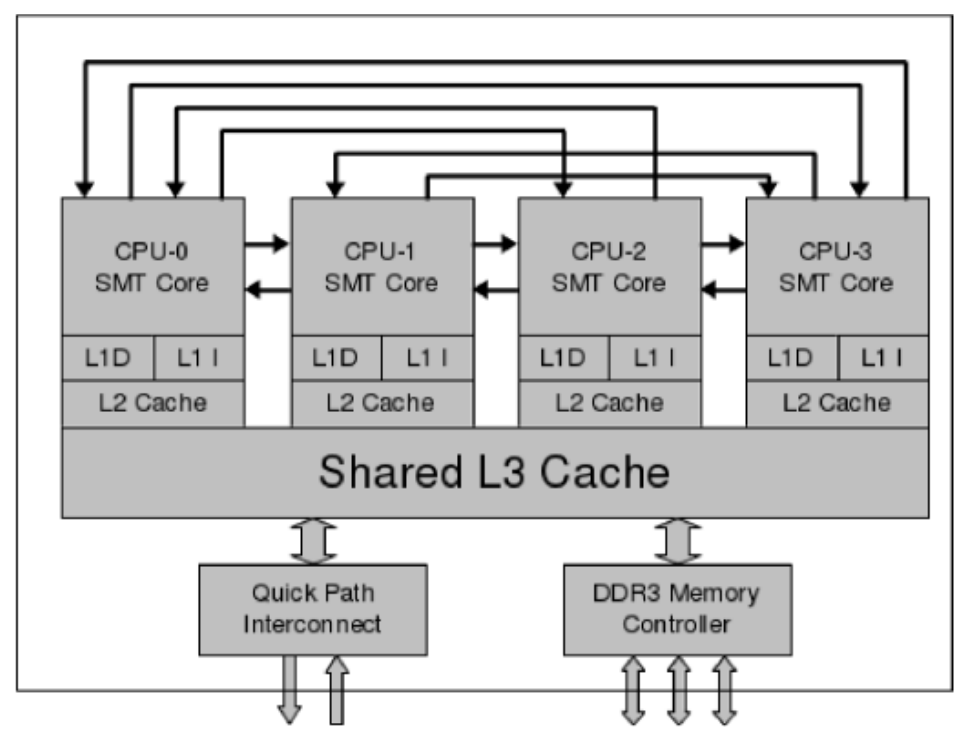

Intel Core i7 Processor Architechture Layout with Simultaneous Multi-threading (SMT)

https://fm.csl.sri.com/LAW09/2011/law2011-paper-bradetich.pdf


**Uso de memória**

Toda vez que passo um número da memória RAM para o processador fazer uma conta, ele não passa apenas esse número, mas tudo que tiver na memória em torno desse número (bloco) que caiba no cache!

_Exemplo idealizado:_

Caso 1:

    Memória tem os números guardados:
    3 , 7 , 8 , 23 , 54 , 77 , 40 , 45

    Quero fazer a conta 3 + 40, e a minha memória cache tem 2 blocos de memória, onde em cada um cabem 2 números por vez apenas, como o computador faz a conta?

    1) O processador pede o número 3 para a memória principal e salva o (3, 7) no bloco 1 cache

    2) O processador pede o número 40 para a memória principal e salva o (40, 45) no bloco 2 cache

    3) Os dois blocos levam as informações para os registradores do processador, e dependendo do processador, ele faz a conta de forma vetorial (3,7) + (40, 45) e retorna (43, 52), sendo o valor 43 salvo na memória RAM no endereço solicitado.
    
    4) Agora, se queremos fazer a conta 8 + 45, o processador pede para jogarem fora o bloco 1 do cache e preencher com (8, 23) para fazer a nova conta, usando o bloco 2 já salvo no cache.
    
    
Caso 2:

    Memória tem os números guardados (vejam a troca do 7 pelo 8):
    3 , 8 , 7 , 23 , 54 , 77 , 40 , 45

    Quero fazer a conta 3 + 40, e a minha memória cache tem 2 blocos de memória, onde em cada um cabem 2 números por vez apenas, como o computador faz a conta?

    1) O processador pede o número 3 para a memória principal e salva o (3, 8) no bloco 1 cache

    2) O processador pede o número 40 para a memória principal e salva o (40, 45) no bloco 2 cache

    3) Os dois blocos levam as informações para os registradores do processador, e dependendo do processador, ele faz a conta de forma vetorial (3,8) + (40, 45) e retorna (43, 53), sendo o valor 43 salvo na memória RAM no endereço solicitado.
    
    4) Agora, se queremos fazer a conta 8 + 45, o processador já percebe que as informações relevantes estão em cache, e a conta da operação é aproveitada, devolvendo o 53 na memória (caso o processador seja vetorial). Ou então, para um processador não vetorial, ele já tem as informações para fazer a conta rapidamente, sem precisar acessar a RAM!
    
**Alinhamento de memória**

As contas devem ser preferencialmente feitas na ordem em que os dados estão na memória!!!! Quando o processador precisa ficar pedindo novos dados à RAM dizemos que está ocorrendo muito __cache miss__

O caso de um computador real é um pouco mais complicado, mas esse conceito ainda é válido. Mais detalhes em https://courses.cs.washington.edu/courses/cse378/09wi/lectures/lec15.pdf


### Matrizes na memória

In [ ]:
#Matriz
import numpy as np

n = 20000
c = np.ones((n, 2*n))
linhas, colunas = c.shape
print("Matriz: ", c.shape, "\n", c)
print()

#Soma, para cada coluna, os valores das linhas primeiro
#Código ingênuo
#s = 0
#for j in range(colunas):
#    for i in range(linhas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=0)) #axis=0 significa que vai soma as linhas para cada coluna primeiro!
print("Soma coluna a coluna:", s)
print()

#Soma, para cada linha, os valores das colunas primeiro
#Código ingênuo
#s = 0
#for i in range(linhas):
#    for j in range(colunas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=1)) #axis=1  significa que vai somar nas colunas primeiro
print("Soma linha a linha: ", s)
print()



Matriz:  (20000, 40000) 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]

CPU times: user 791 ms, sys: 0 ns, total: 791 ms
Wall time: 813 ms
Soma coluna a coluna: 800000000.0

CPU times: user 583 ms, sys: 0 ns, total: 583 ms
Wall time: 595 ms
Soma linha a linha:  800000000.0



Se ele vai mais rápido somando primeiro as colunas de cada linha, então ele deve armazenar na ordem de linhas!! Isso é chamado de ordem no estilo "C" (padrão em Python) - Row-major order

Ordem C: 

         -------------------
         -------------------
         -------------------
         -------------------
         -------------------
         
É possível pedir para o Python armazenar de outro jeito, a ordem no estilo Fortran - Column-major order

Ordem Fortran: 

               | | | | | | | |
               | | | | | | | |
               | | | | | | | |               
               | | | | | | | |
               | | | | | | | |               


Mais info em : https://scipy-lectures.org/advanced/advanced_numpy/index.html#cache-effects

Ordem C (por linhas):

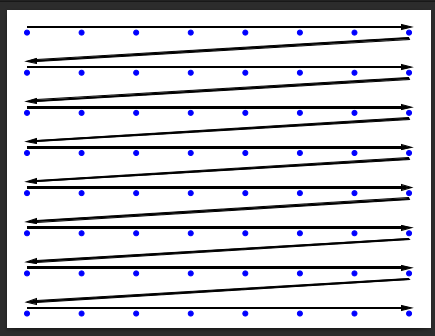

Ordem Fortran (por colunas):

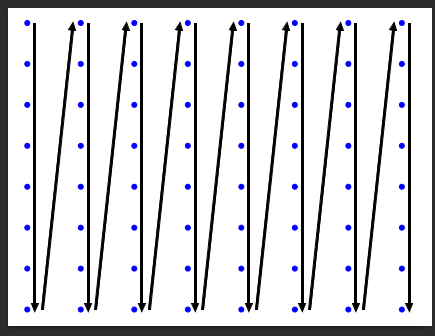

In [ ]:
#Repetindo o exemplo anterior com ordem Fortran

#Matriz
import numpy as np

n = 10000
c = np.ones((n, 2*n), order='F')
linhas, colunas = c.shape
print("Matriz: ", c.shape, "\n", c)
print()

#Soma, para cada coluna, os valores das linhas primeiro
#Código ingênuo
#s = 0
#for j in range(colunas):
#    for i in range(linhas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=0)) #axis=0 significa que vai soma as linhas para cada coluna primeiro!
print("Soma coluna a coluna:", s)
print()

#Soma, para cada linha, os valores das colunas primeiro
#Código ingênuo
#s = 0
#for i in range(linhas):
#    for j in range(colunas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=1)) #axis=1  significa que vai somar nas colunas primeiro
print("Soma linha a linha: ", s)
print()


Matriz:  (10000, 20000) 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]

CPU times: user 255 ms, sys: 22.8 ms, total: 278 ms
Wall time: 258 ms
Soma coluna a coluna: 200000000.0

CPU times: user 139 ms, sys: 0 ns, total: 139 ms
Wall time: 139 ms
Soma linha a linha:  200000000.0



Note que agora ficou mais rápido lendo coluna a coluna (significa que vai somar as linhas para cada coluna primeiro!)!

### Stride e sua relação com cache miss

Strides: número de bytes para pular na memória até chegar no próximo elemento. 

Exemplo: Uma matrix 10x10 com stride de (10,1) significa que:
- Para chegar na próxima linha tem que pular 10 bytes
- Para chegar na próxima coluna, basta olhar o próximo byte

Logo, isso está fortemente conectado ao conceito visto antes de ordenamento.


In [ ]:
#Cada inteiro neste caso foi forçado a ocupar 2 bytes na memória (16 bits). 1 byte = 8 bits
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.int16, order='C')

print("Ordem C: ", x.strides)

x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.int16, order='F')

print("Ordem F: ", x.strides)

Ordem C:  (6, 2)
Ordem F:  (2, 6)


Logo, no Python podemos especificar a ordem de armazenamento dos elementos de uma matriz para aumentar a eficiência do código.